## Executive Summary

   As climate change becomes a more pressing issue as the days go by, governments all over the world are actively moving to more renewable energy sources, namely wind energy, using turbines. With this comes a multitude of challenges, one of the most critical becoming energy storage. Producing energy only when there is enough wind to turn the turbines, the supply of energy from these turbines are not consistent, such that in order to prrserve this energy for use, batteries are needed. The goal of our project is to be able to help states be able to more efficiently allocate batteries, as the nature of energy production with these turbines are inconsistent due to seasonality. We believe that by using wind speed and location datasets, we are able to forecast future energy production by wind turbines, enabling states to better understand energy supply at a given time in the year, and allocate batteries more efficiently, saving costs and increasing utility. Batteries are becoming an increasingly important part of most energy companies of today, and pushing states to become more efficient and increase utility will increase competitiveness and speed up research and development, ushering in a new era of renewable energy and capactity and efficiency improves, enriching the lives billions of people across the world.


## Importing Required Packages

In [1]:
import pandas as pd
import plotly.express as px
from sklearn.cluster import DBSCAN, KMeans
import numpy as np
from matplotlib import pyplot as plt, scale as s, axis as ax
from sklearn.preprocessing import normalize
from sklearn.neighbors import NearestNeighbors
import statsmodels.api as sm
import matplotlib
import warnings
import itertools
from pylab import rcParams


ModuleNotFoundError: No module named 'plotly'

## Functions

In [ ]:
def shortenWeather():

    #Function makes a new shorter weather database

    DATABASE = open("./weather.csv", "r")
    SHORTEND_DATABASE = open("./locations.csv", "w")
    for line in DATABASE:
        currentline = line.split(",")
        SHORTEND_DATABASE.write(currentline[7] + "," + currentline[8] + "\n")
    DATABASE.close()
    SHORTEND_DATABASE.close()

def shortenWindTurbine():

    #Function makes a shorter windmill database

    DATABASE = open("./locations.csv", "r")
    SHORTEND_DATABASE = open("./locationsPREP.csv", "w")
    next(DATABASE)
    for line in DATABASE:
        currentline = line.split(",")
        city = currentline[0]
        state = currentline[1]
        location = city + ", " + state
        SHORTEND_DATABASE.write(location)
    DATABASE.close()
    SHORTEND_DATABASE.close()

def readability():

    #Function makes the data easier to read by the human eye
    
    DATABASE = open("./locationsPREP.csv", "r")
    SHORTEND_DATABASE = open("./locationsAPILIST.csv","w")

    for line in DATABASE:
        currentline = line.split("\"")
        SHORTEND_DATABASE.write(currentline[1] + "\n")
    DATABASE.close()
    SHORTEND_DATABASE.close()

def averageWindspeed():

    #Function creates a database with the average windspeed per state

    k = open("./windspeed.csv", 'w')
    states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE", "FL","GA","HI","ID","IL","IN","IA","KS","KY","LA","ME","MD","MA","MI","MN","MS","MO","MT","NE","NV","NH","NJ","NM","NY","NC","ND","OH","OK","OR","PA","RI","SC","SD","TN","TX","UT","VT", "VA", "WA", "WV", "WI", "WY"]
    previousState = ""
    previousWind = 0
    currentState = ""
    currentWind = 0
    counter = 0

    for x in range(0, 50):
        f = open("./weather.csv", 'r')
        for j in f:
            j = j.split(",")
            currentState = j[8].replace("\"", "").replace(" ", "")
            currentWind = j[13].replace("\"", "")
            currentWind = currentWind.replace("\n", "")
            if currentState == states[x]:
                counter += 1
                previousWind += float(currentWind)
        if counter == 0:
            counter = 1
        k.write(states[x] + "," + str(previousWind / counter) + "\n")
        previousWind = 0
        counter = 0
    print("completed!")

def numTurbinePerState():
    k = open("./windmillNumber.csv", 'w')
    states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE", "FL","GA","HI","ID","IL","IN","IA","KS","KY","LA","ME","MD","MA","MI","MN","MS","MO","MT","NE","NV","NH","NJ","NM","NY","NC","ND","OH","OK","OR","PA","RI","SC","SD","TN","TX","UT","VT", "VA", "WA", "WV", "WI", "WY"]
    currentState = ""
    counter = 0

    for x in range(0, 50):
        f = open("./windmill.csv", 'r')
        for j in f:
            j = j.split(",")
            currentState = j[5].replace("\"", "").replace(" ", "")
            if currentState == states[x]:
                counter += 1
        k.write(states[x] + "," + str(counter) + "\n")
        counter = 0
    print("completed!")

def completeDatabase():

    #Function combines the two other databases into one
    
    a = open("./windspeed.csv", 'r')
    k = open("./fullDatabase.csv", 'w')

    for aLine in a:
        b = open("./windmillNumber.csv", 'r')
        aState = aLine.split(",")
        aState1 = aState[0].replace(",", "")
        for bLine in b:
            bState = bLine.split(",")
            bState1 = bState[0].replace(",", "")
            if aState1 == bState1:
                k.write(aState[0] + "," + aState[1].replace("\n", "") + "," + bState[1])
    print("completed!")

def turbineVisibility():

    #Function makes a graph using plotly to visualize the number of windmills for each state's wind speed
    
    df = pd.read_csv("./fullDatabase.csv")

    fig = px.scatter(df, x="AvgWindSpeed", y="NumWindTurbines", color="Cluster" , text="State", log_x=True, size_max=60)
    fig.update_traces(textposition='top center')
    fig.update_layout(
        height=800,
        title_text='Correlation of Average Wind Speed to the Number of Wind Turbines in Each State'
    )

    fig.show()

def normalizeAndCluster():

    #Function normalizes the data and then clusters it
    
    X = [[4.817735849056603, 0], [6.429959278650383, 0], [4.6620754716981105, 0],
        [3.2981132075471713, 0], [4.893633633633638, 0], [4.322830188679246, 0],
        [6.474905660377357, 0], [6.760377358490566, 0], [6.299952830188672, 0],
        [4.682515723270437, 0], [8.97158490566038, 0], [4.822452830188679, 0],
        [7.0817610062893, 0], [6.836933962264153, 0], [8.00867924528302, 0],
        [8.249496855345908, 0], [5.003283018867923, 0], [5.115708812260539, 0],
        [5.913647798742142, 0], [5.6275471698113195, 0], [8.74699346405229, 0],
        [5.966897274633118, 0], [7.512603773584907, 0], [4.747061994609168, 0],
        [7.061024258760106, 0], [6.455180102915949, 0], [8.054528301886787, 0],
        [5.22446540880503, 0], [18.01789999999999, 0], [7.191603773584909, 0],
        [6.353584905660383, 0], [6.9299292452830255, 0], [5.236954177897564, 0],
        [8.457207547169808, 0], [7.212156334231806, 0], [8.456792452830182, 0],
        [4.863160377358488, 0], [5.855525606469006, 0], [7.056981132075473, 0],
        [4.973207547169816, 0], [8.469660377358487, 0], [4.08238095238095, 0],
        [7.726422955974852, 0], [4.626792452830189, 0], [6.174150943396226, 0],
        [5.768571428571426, 0], [4.930781671159025, 0], [4.146698113207547, 0],
        [6.741367924528297, 0], [7.461283018867928, 0]]

    clustering = DBSCAN(eps=.04, min_samples=2).fit(X)
    clusterArray = clustering.labels_
    clustering.labels_

    f = plt.figure()
    plt.style.use('seaborn')

    data = pd.read_csv('fullDatabase.csv')
    windspeed = data['AvgWindSpeed']
    windmills = data['NumWindTurbines']
    cluster = clusterArray
    states = data['State']

    plt.scatter(windspeed, windmills, edgecolor='black', s=150, c=cluster, linewidth=1, alpha=0.3, marker='D')
    plt.xlabel('Average Wind Speed', fontsize = 26)
    plt.ylabel('Windmill Count', fontsize = 36)
    plt.xticks(np.arange(0,19,2),fontsize=30)
    plt.yticks(np.arange(0,17500,2500),fontsize=30)
    f.set_figwidth(20)
    f.set_figheight(15)
    plt.savefig('graph.png')

def epsilonValue():
    warnings.filterwarnings("ignore")
    file = open("./epsDatabase.csv")
    array = np.loadtxt(file, delimiter=",")
    array = normalize(array)

    neigh = NearestNeighbors(n_neighbors=2)
    nbrs = neigh.fit(array)
    distances, indices = nbrs.kneighbors(array)

    distances = np.sort(distances, axis=0)
    distances = distances[:,1]
    plt.plot(distances)    

def graphYearData():
    #Change State abbreviation to view different states
    plt.style.use('fivethirtyeight')
    matplotlib.rcParams['axes.labelsize'] = 14
    matplotlib.rcParams['xtick.labelsize'] = 12
    matplotlib.rcParams['ytick.labelsize'] = 12
    matplotlib.rcParams['text.color'] = 'k'
    df = pd.read_csv("statePicker.csv", parse_dates = ["Date.Full"], index_col = "Date.Full")
    #change letters here to view different state
    global y
    y = df.loc[df['Station.State'] ==  'NY']
    cols = ['Station.State']# ' Station.Location']
    y.drop(cols, axis=1, inplace=True)
    plt.scatter(y.index.values,y['Data.Wind.Speed'], color='blue')

def dataDecomposition():
    rcParams['figure.figsize'] = 18, 8
    decomposition = sm.tsa.seasonal_decompose(y, model='additive', period = 5)
    fig = decomposition.plot()
    plt.show()

def calculateAICValues():
    p = d = q = range(0, 2)
    pdq = list(itertools.product(p, d, q))
    seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
    min_aic = np.Infinity
    global aic_params
    aic_params = [[], []]
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                mod = sm.tsa.statespace.SARIMAX(y,
                                                order=param,
                                                seasonal_order=param_seasonal,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False)
                results = mod.fit()
                if min_aic > results.aic: 
                    min_aic = results.aic
                    aic_params = [param, param_seasonal]
                print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            except:
                continue

def summaryAICTable():
    # order and seasonal order values are the lowes AIC values from the list of AIC values resulting from the calculations from the kernel above
    mod = sm.tsa.statespace.SARIMAX(y,
                                    order=(aic_params[0][0], aic_params[0][1], aic_params[0][2]),
                                    seasonal_order=(aic_params[1][0], aic_params[1][1], aic_params[1][2], aic_params[1][3]),
                                    enforce_invertibility=False)
    global results
    results = mod.fit()
    print(results.summary().tables[1])

def diagnosticGraphs():
    results.plot_diagnostics(figsize=(16, 8))
    plt.show()

def midYearForcasting():
    pred = results.get_prediction(start=pd.to_datetime('2016-06-05'), dynamic=False)
    pred_ci = pred.conf_int()
    ax = y['2016':].plot(label='observed')
    pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
    ax.fill_between(pred_ci.index,
                    pred_ci.iloc[:, 0],
                    pred_ci.iloc[:, 1], color='k', alpha=.2)
    ax.set_xlabel('Date')
    ax.set_ylabel('Wind Speed')
    plt.legend()
    plt.show()

def oneYearForecasting():
    #changes steps to view different amount of years (50 = 1 year, 100 = 2 years, etc.)
    pred_uc = results.get_forecast(steps=50)
    pred_ci = pred_uc.conf_int()
    ax = y.plot(label='observed', figsize=(14, 7))
    pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
    ax.fill_between(pred_ci.index,
                    pred_ci.iloc[:, 0],
                    pred_ci.iloc[:, 1], color='k', alpha=.25)
    ax.set_xlabel('Date')
    ax.set_ylabel('Wind Speed')
    # plt.ylim((-100,100))
    plt.legend()
    plt.show()


## 1. Consolidate Data

The data in our original databases was bulky and excessive. We first needed to consolidate that data into one database.

The features of the dataset are:
   
   1. Average windspeed per state
   2. Number of windmills per state

In [ ]:
# It is highly recommended for this section to REMAIN commented out in order to ensure smooth running
# of the Jupyter Notebook.
# These methods are commented out as we already have the files (files need to exist to 
# ensure successful running of our Jupyter Notebook) produced by these methods.
# With that being said, we cannot guarantee that these methods will be able to reproduce those
# aformentioned files, as we used a variety of methods to produce these files needed by our Notebook
# to run, including Excel.
#shortenWeather()
#shortenWindTurbine()
#readability()
##averageWindspeed()
#numTurbinePerState()
#completeDatabase()

All of these gradually shorten and consolidate the databases into one database with the data we need.

## 2. Visualization

Before applying machine learning to the dataset, it is important that we get a visual on the complete database. This also served as our testing of the different plotting libraries available.

In [ ]:
turbineVisibility()

## 3. Normalizing and Clustering

After visualizing our data, it is time to cluster it. To do that properly, we muct first normalize it. This makes all of the data be on a normal scale that is easy for the library to read and allows us to get other data needed.

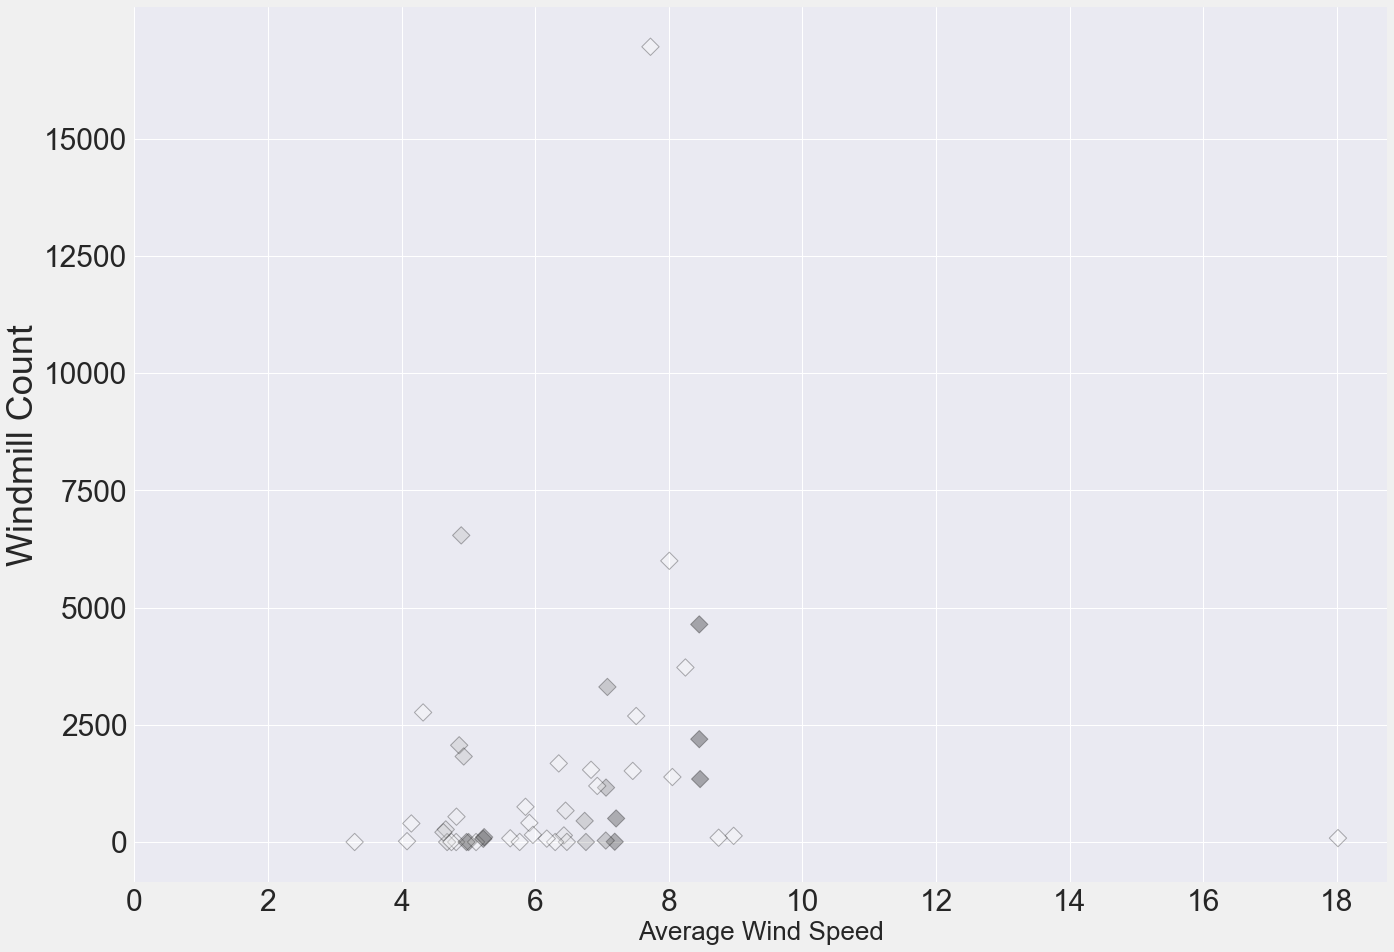

In [ ]:
normalizeAndCluster()

This code clusters our data using K-Means clustering. Strangely, our graph seems to have outliers, even though K-means clustering does not account for outliers like DBSCAN does. In hopes of clearing this up, we decided to then switch to DBSCAN.

# This is the Time Analysis Forecasting and EPS Value Seeking
In order:
1. EPS Value Finder
2. Representation of Data over one year
3. The decomposition data
4. Calculation of the AIC value for forecasting
5. Summary of additional AIC results
6. Diagnostic Information
7. 1/2 Year Forecasting vs Actual Data
8. 1 Year Ahead Forecasting Data

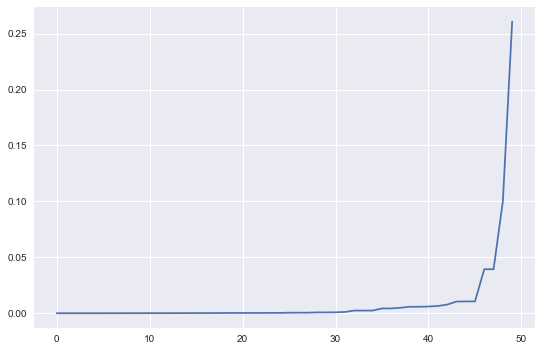

In [ ]:
epsilonValue()

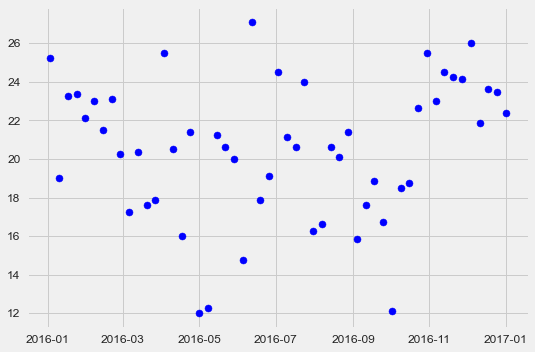

In [ ]:
graphYearData()

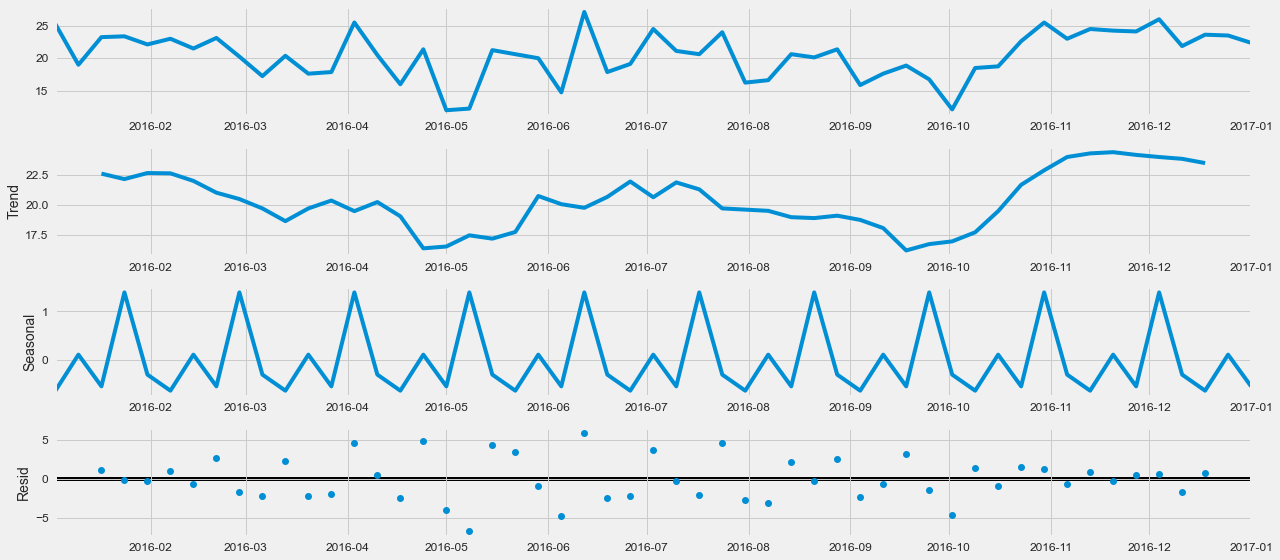

In [ ]:
dataDecomposition()

In [ ]:
calculateAICValues()

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:464.8687754222553
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:337.52084146123315
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:261.65448286505955
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1207.7638694221698
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:270.43222979654723
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:244.9078161467276
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:170.42167796050367
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:164.7787612602554
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:402.8159245427169
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:298.3485081279294
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:254.0770693955796
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1151.0829970041268
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:269.76308630863383
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:237.98752814727973
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:166.533589941979
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:157.68984504089502
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:294.1380858066069
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:230.09962721764876
A

In [ ]:
summaryAICTable()

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6476      0.148     -4.373      0.000      -0.938      -0.357
ar.S.L12      -0.4215      0.283     -1.490      0.136      -0.976       0.133
ma.S.L12      -1.0000   1.12e+04  -8.93e-05      1.000    -2.2e+04     2.2e+04
sigma2        10.0677   1.13e+05   8.93e-05      1.000   -2.21e+05    2.21e+05


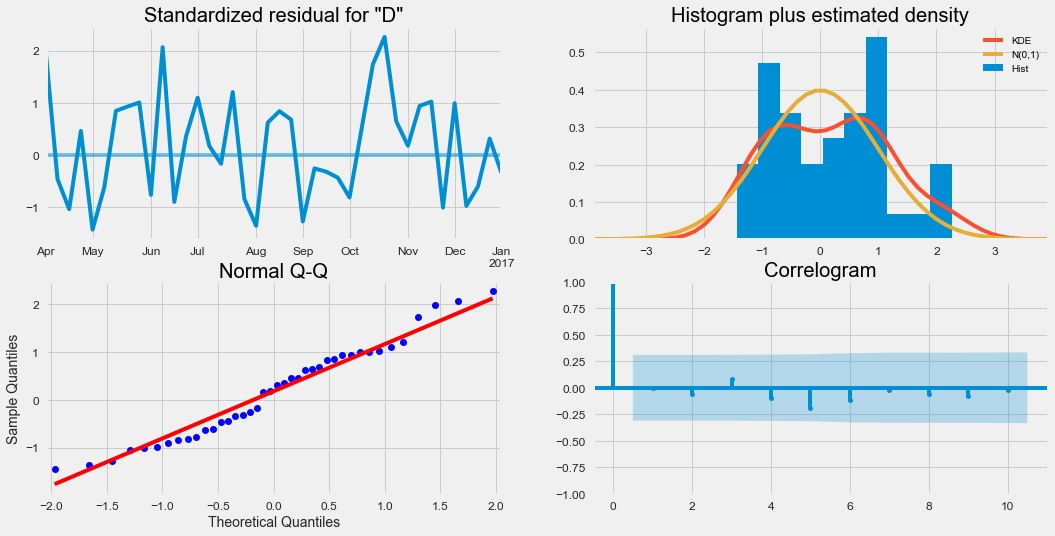

In [ ]:
diagnosticGraphs()

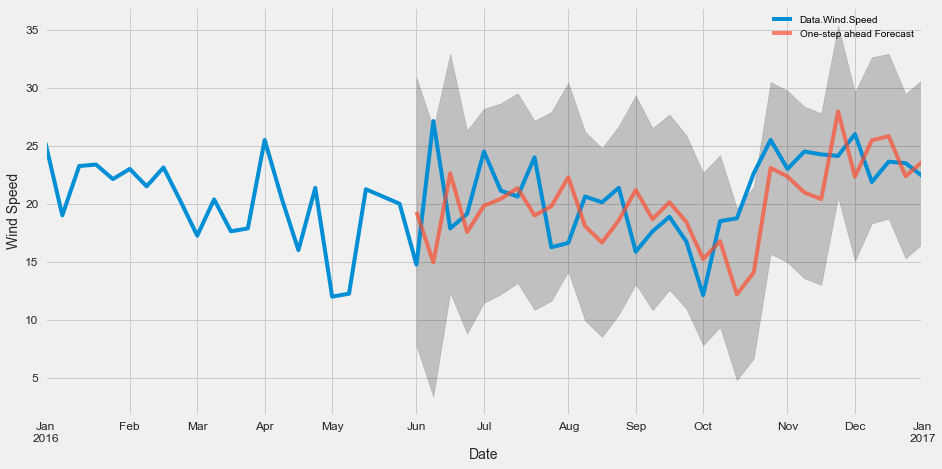

In [ ]:
midYearForcasting()

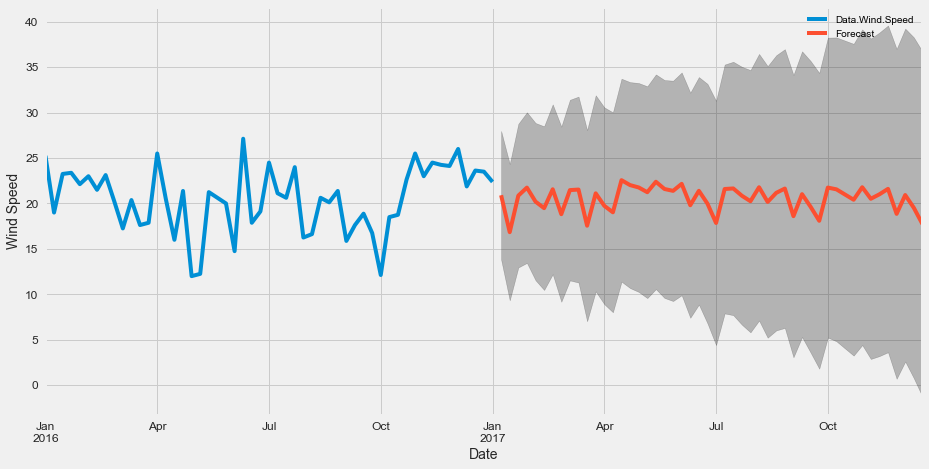

In [ ]:
oneYearForecasting()

## Conclusion

The initial goal of this project is to determine the best state to place a wind turbine by analyzing wind speed data. However, due to later findings and obstacles encountered relating to the many considerations that has to be accounted for when building these wind turbines, including but not limited to: seasonality, forestation, climate, remoteness, etc, we have modified our goal. Changing it to determine during which time of year windspeeds are higher or lower, so that states are able to better allocate batteries (which holds energy generated by wind turbines). 

The starting method of clustering used for the project was DBSCAN. After less then optimal results, the method was switched to K-means, which returned much more satisfactory results then the original DBSCAN. The clustering was done to help find correlation between states with different windspeed and wind turbine count. However, this proved to be very ineffective, as it only helped show optimal states with a average windspeed and wind turbine count. This was mainly due to an amount of outside factors (terrain, space, money, etc.) that wasn't able to be taken into account resulting in the clustering being primarily used to show states with optimal turbine to wind speed ratio excluding any external factors.

After clustering our data, we proceeded with performing SARIMA on our time series data. We were fortunate to be able to achieve incredible results with SARIMA reaching reasonable accuracy with our model's predictions. With each state having varied patterns and circumstances, a solution cannot be generalized for all states. However, with a working model that can determine when windspeeds can rise and fall with reasonable accuracy, states are better able to gauge battery and storage needs for wind turbines in general within said state, accomplishing the modified goal for our project.